Introduction

Survival analysis is a broad field in statistics with a long history. Survival analysis deals with modeling time-to-event (TTE) data, or the duration until a specific event of interest occurs. Despite the long statistical history, recent developments in machhine learning have extended to survival analysis and revolutionized the field. The name,survival analysis, comes from the fact that these models were originally used to model patient outcome in medical studies. However, survival analysis has since been extended to other industries such as business and engineering. This project focuses on extending survival analysis for predictive maintenance, specifically for the well researched NASA turbofan dataset. Predictive maintenance is vital to engineering and manufacturing because it can be used to maximize machine uptime and minimize costs by accurately predicting when a machine will fail and thus needs to be repaired. Typically in predictive maintenance if a machine fails at time N, it is more costly to have predicted failure at N + 1 instead of N - 1. This is because if you can take the machine offline to fix the problem before it causes failure, it typically has an easier solution with more defined behavior since the engineers decide when to stop it. 

Background / Related work

There are three classes of statistical methods for survival analysis: parametric, semi-parametric, and non-parametric. Parametric approaches make the most assumptions about the data by assuming an specific underlying distribution, such as the Weibuss distribution. Since parametric approaches make such drastic assumptions, they are not very flexible and have performance constrained by the accuracy of these assumptions, yet they are easy to interpret. Semi-parametric approaches are traditionally the most popular for statistical approaches and fit a time-series regression model to the data. One example of these methods is the Cox Proportional Hazards model. These models are slightly more flexible than parametric approaches and are still relatively easy to interpret. Another benefit to these models is that they can be calibrated to prevent overfitting with regularization techniques. Finally, non-parametric approaches make the lease assumptions about the data and innstead estimate the underlying survival function, the function that denotes the probability that a particular machine will fail by a given time, based off the data. These methods are the most flexible yet have a lower ceiling on their power as predictive models.
Additionally, there are various machine learning approaches to survival analysis and predictive maintenance that have been developed that can outperform traditional statistical approaches. The most basic of such models are decision tree based algorithms like random survival forests, classification and regression trees (CART), and boosting algorithms like XGBoost, CatBoost, and Light Gradient Boosting Machine. These methods, particularly the boosting ones, are popular because they are relatively powerful and offer a high amount of transparency when it comes to machine learning approaches. This transparency is helpful for medical situtations or predictive maintenance in engineering because often times you want to know which factor, e.g. a health related component like age or engineering related part like a specific motor was too hot, caused the failure. Deep learning approaches are also popular because they are typically very powerful and can outperform simple decision tree based algorithms. Since survival analysis is modeling time-series data, methods that can account for sequential information, like variations of Recurrent Neural Networks, Long Short Term Memory (LSTM) networks, and transofrmer based models, are typically used. 

Method description

This project aims to compare the performance of various machine learning methods for predictive maintenance on the NASA turbofan dataset. The dataset contains time-series readings for various IoT devices for hundreds of turbofan engines until the engines fail. The dataset consists of 4 types of environments with different conditions for turbofan engines. For each environment, there is a specific training file and testing file. The training files contain sensor data on 100 engines for several time cycles until each engine has failed. For the test files, all of the engines are forcebly stopped before failure but there is an additional RUL (remaining useful life) file denoting how much longer each engine would have ran for. Thus, when designing models to predict the remaining useful life on the test data, you would base the prediction off of the last time cycle for each engine and would try to predict a value close to what is listed for the corresponding engine in the RUL file. This adds complexity to the prediction problem because if an enginer fails at time N, it would typically be easier to predict that failure based off data from time N - 1 compared to using data for e.g. N - 50. This project begins with some initial data exploration and preprocessing before using statistical and machine learning methods to model the data. For statistical approaches, I select one parametric, one semi-parametric, and one non-parametric model to compare the three classes. Then for machine learning methods, I use linear regression as a baseline model before comparing performance of three boosting algorithms, Extreme Gradient Boost (XGBoost), CategoricalBoost (CatBoost), and Light Gradient Boosting Machine (LBGM). I then compare these models to deep learning methods that are traditionally better equipt for handling sequential data by using an open source transformer based model and creating a Convolutional Neural Network Long Short Term Memory Network (CNN-LSTM). 

Results & Discussion

I had hypothesized that the the linear regression model would perform the worst because it assumes a linear relationship between input features and the target output, remaining useful life (RUL), and it cannot account for feature interactions. Since the chosen decision tree based algorithms are not prone to these issues, I assumed that they would all perform better than linear regression, with CatBoost performing the worst of the three since it is specialized for modeling categorical data and this dataset is entirely numeric. I then hypothesized that the transformer based model would be better than the boosting algorhtms because it can effectively model sequential relationships with its attention mechanism. I assumed the CNN-LSTM would be even better than the transformer model and be the best performing model because it is also designed for sequential data processing yet does not require as much training data as a transformer model, and this turbofan dataset was not gigantic (on average 200 readings for each of the 100 engines). 

After evaluating all of my models according to Root Mean Squared Error (RMSE) for their predictions and R^2, I was surprised to find that the tranformer based model typically performed worst and, depending on the testing/validation split, the CNN-LSTM model was the seconds worst or worst model. This is becuase both models were very prone to overfitting, even after including various methods to mitigate this such as adjusting learning rate, adding l2 regularization and high dropouts, simplifying the model features and layers, reducing the number of input features, and adding early stopping to the CNN-LSTM model. I also added incorperated some of these strategies to the open source transformer based model that I found [here](https://github.com/jiaxiang-cheng/PyTorch-Transformer-for-RUL-Prediction/tree/master), which improved the model performance slightly. Linear regression greatly outperformed these two deep learning models and achieved an RMSE of about 50% of them. The boosting algorithms were slightly better than linear regression, with XGBoost performing the worst, CatBoost the middle, and Light Gradient Boosting Machine as the best according to R^2 and RMSE. An analysis of feature importance on the boosting models revealed that the 'Cycle' number was the most informative column for predicting remaining useful life (RUL). This is to be expected because RUL is a measure of how many more time cycles the engine will be running, which is highly dependent on the current cycle. Not many of the sensor readings were informative for the boosting models besides sensor 11, 14, 9, 4, and 12. For overall model runtime performance, the transformer based model was slowest, followed by the CNN-RNN, then LR, then CatBoost, then XGBoost, and Light Gradient Boosting with the fastest runtime, which was expected due to its use of Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB). 

Conclusion

This projected centered on extending survival analysis methods to perform predictive maintenance for the engineering and manufacturing space. I tested various machine learning models on how accurately they could predict the remaining useful life (RUL) for various NASA turbofan engines. Although my initial hypotheses on model performances did not all hold true, I think given a larger dataset, tried and true approaches like transformer models and variations of LSTM networks still hold a lot of promise for predictive maintenance problems. Nevertheless, the linear regression and boosting models, which are often discounted for their simplicity, proved to be the most accurate models. Their performance, especially for Light Gradient Boosting Machine, combined with their model transparency, makes these methods effective choices for predictive maintenance. 

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
raw_data = pd.read_csv('CMAPSSData/train_FD001.txt', sep=" ", header=None)
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [ ]:
raw_data.drop(raw_data.columns[[26, 27]], axis=1, inplace=True) # Drop NaN columns
# Column names outlined in paper: Damage Propogation Modeling.pdf
raw_data.columns = ['ID', 'Cycle', 'OperationalSetting1', 'OperationalSetting2', 'OperationalSetting3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data.head()

,ID,Cycle,OperationalSetting1,OperationalSetting2,OperationalSetting3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
# add remaining useful life (RUL) column to all engines
max_cycles = raw_data.groupby('ID')['Cycle'].max().reset_index().rename(columns={'Cycle': 'MaxCycle'})
df = raw_data.merge(max_cycles, on='ID')
df['RUL'] = df['MaxCycle'] - df['Cycle']
df['EngineFailure'] = (df['RUL'] == 0).astype(int)
df.drop('MaxCycle', axis=1, inplace=True)
df.head()

,ID,Cycle,OperationalSetting1,OperationalSetting2,OperationalSetting3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,RUL,EngineFailure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


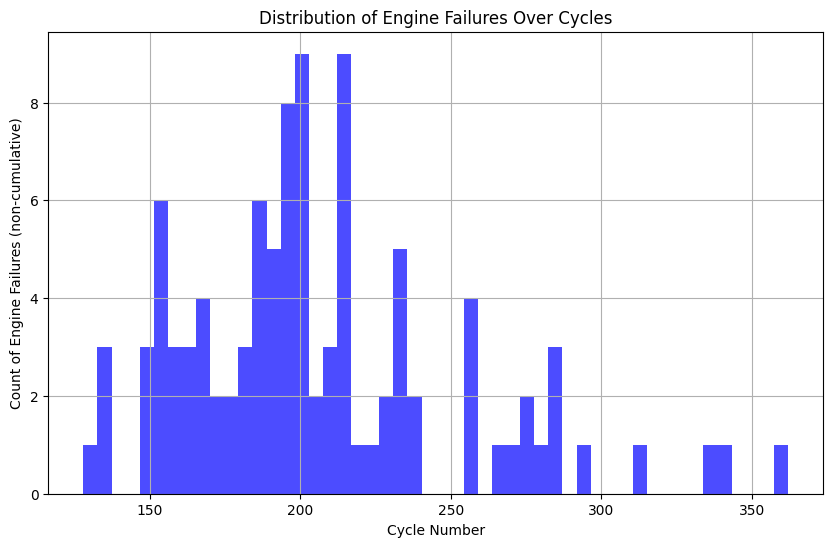

In [ ]:
# Plot the distribution of engine failures over cycles
last_cycles = df[df['RUL'] == 0]['Cycle']

plt.figure(figsize=(10, 6))
plt.hist(last_cycles, bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Engine Failures Over Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('Count of Engine Failures (non-cumulative)')
plt.grid(True)
plt.show()

In [ ]:
print(df.columns)

Index(['ID', 'Cycle', 'OperationalSetting1', 'OperationalSetting2',
       'OperationalSetting3', 'SensorMeasure1', 'SensorMeasure2',
       'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6',
       'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10',
       'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13',
       'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16',
       'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19',
       'SensorMeasure20', 'SensorMeasure21', 'RUL', 'EngineFailure'],
      dtype='object')


In [ ]:
print(df['RUL'].describe())

count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64


In [ ]:
print(df['Cycle'].describe())

count    20631.000000
mean       108.807862
std         68.880990
min          1.000000
25%         52.000000
50%        104.000000
75%        156.000000
max        362.000000
Name: Cycle, dtype: float64


In [ ]:
print(df['EngineFailure'].value_counts())

0    20531
1      100
Name: EngineFailure, dtype: int64


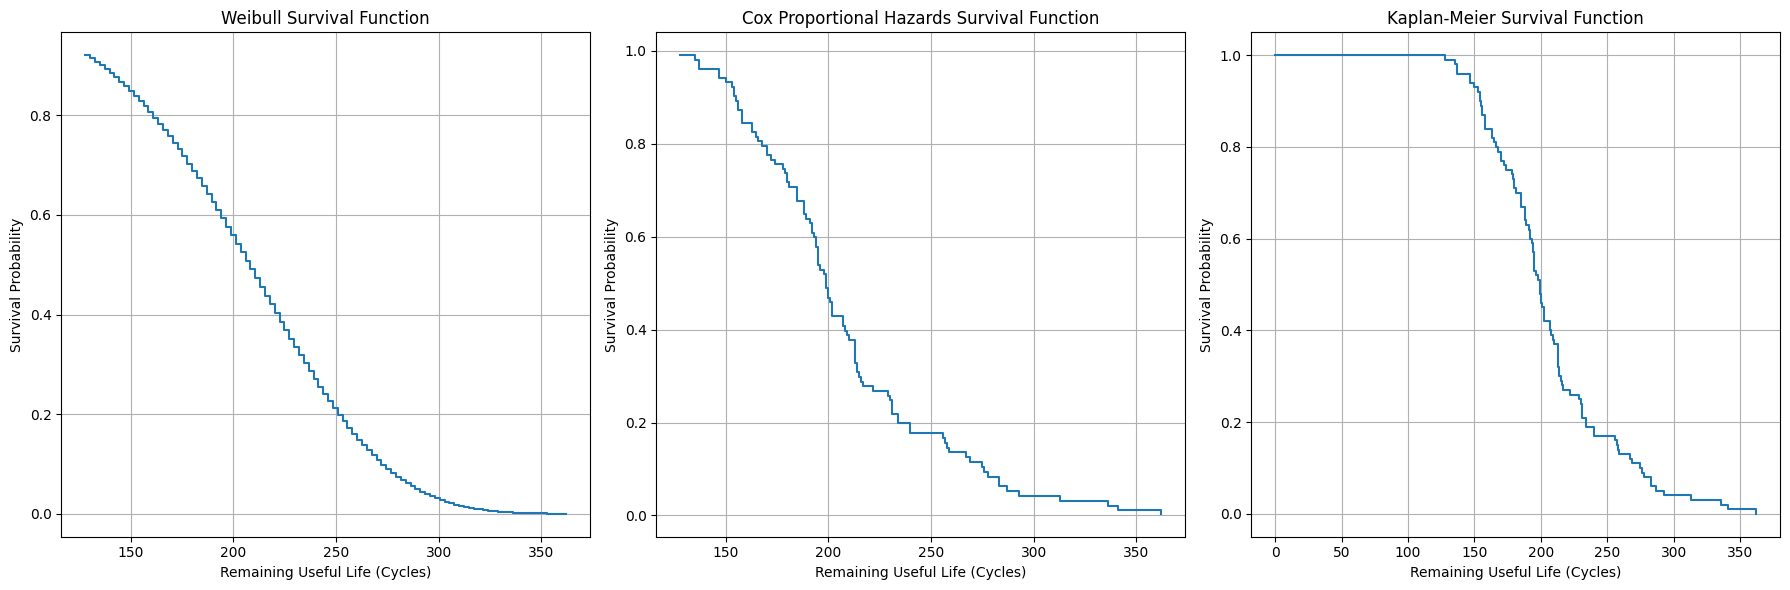

In [ ]:
# Use one parametric, one semi-parametric, and one non-parametric statistical method to model the survival function of the engines
from lifelines import WeibullFitter, CoxPHFitter, KaplanMeierFitter

max_rul = df.groupby('ID')['Cycle'].max().reset_index(name='MAX_RUL')
max_rul['EngineFailure'] = 1

# Initialize models
wf = WeibullFitter() # Weibull, a parametric model
cf = CoxPHFitter() # Cox Proportional Hazards, a semi-parametric model
kmf = KaplanMeierFitter() # Kaplan-Meier, a non-parametric model

# Fit models
wf.fit(max_rul['MAX_RUL'], event_observed=max_rul['EngineFailure'])
cf.fit(max_rul, duration_col='MAX_RUL', event_col='EngineFailure')
kmf.fit(max_rul['MAX_RUL'], event_observed=max_rul['EngineFailure'])

# Plot survival functions
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Weibull
ax[0].plot(wf.survival_function_, drawstyle='steps-post')
ax[0].set_title('Weibull Survival Function')
ax[0].set_xlabel('Remaining Useful Life (Cycles)')
ax[0].set_ylabel('Survival Probability')
ax[0].grid(True)

# Cox Proportional Hazards
ax[1].plot(cf.baseline_survival_, drawstyle='steps-post')
ax[1].set_title('Cox Proportional Hazards Survival Function')
ax[1].set_xlabel('Remaining Useful Life (Cycles)')
ax[1].set_ylabel('Survival Probability')
ax[1].grid(True)

# Kaplan-Meier
ax[2].plot(kmf.survival_function_, drawstyle='steps-post')
ax[2].set_title('Kaplan-Meier Survival Function')
ax[2].set_xlabel('Remaining Useful Life (Cycles)')
ax[2].set_ylabel('Survival Probability')
ax[2].grid(True)

plt.tight_layout()
plt.show()


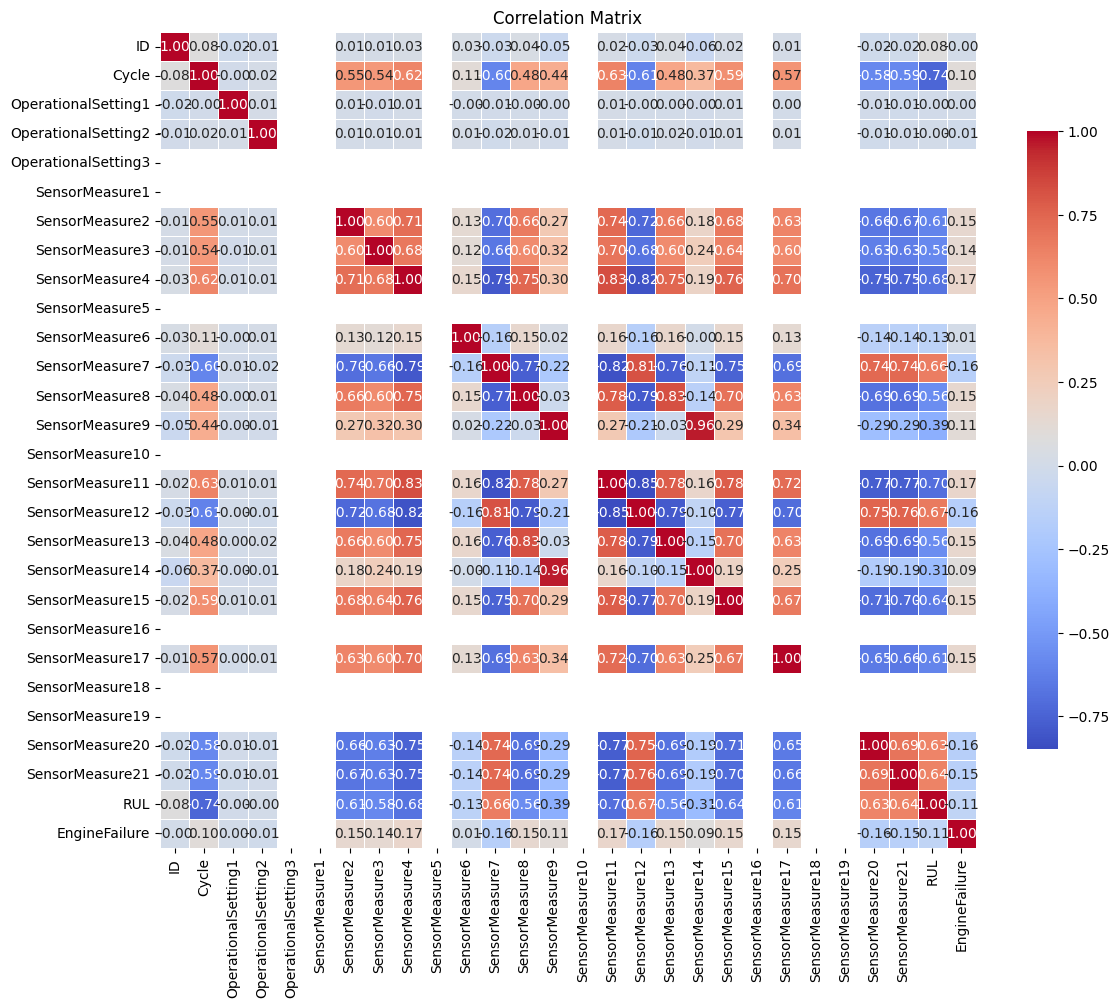

In [ ]:
# Plot the correlation matrix of the features, note the sparcity of the matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .75})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

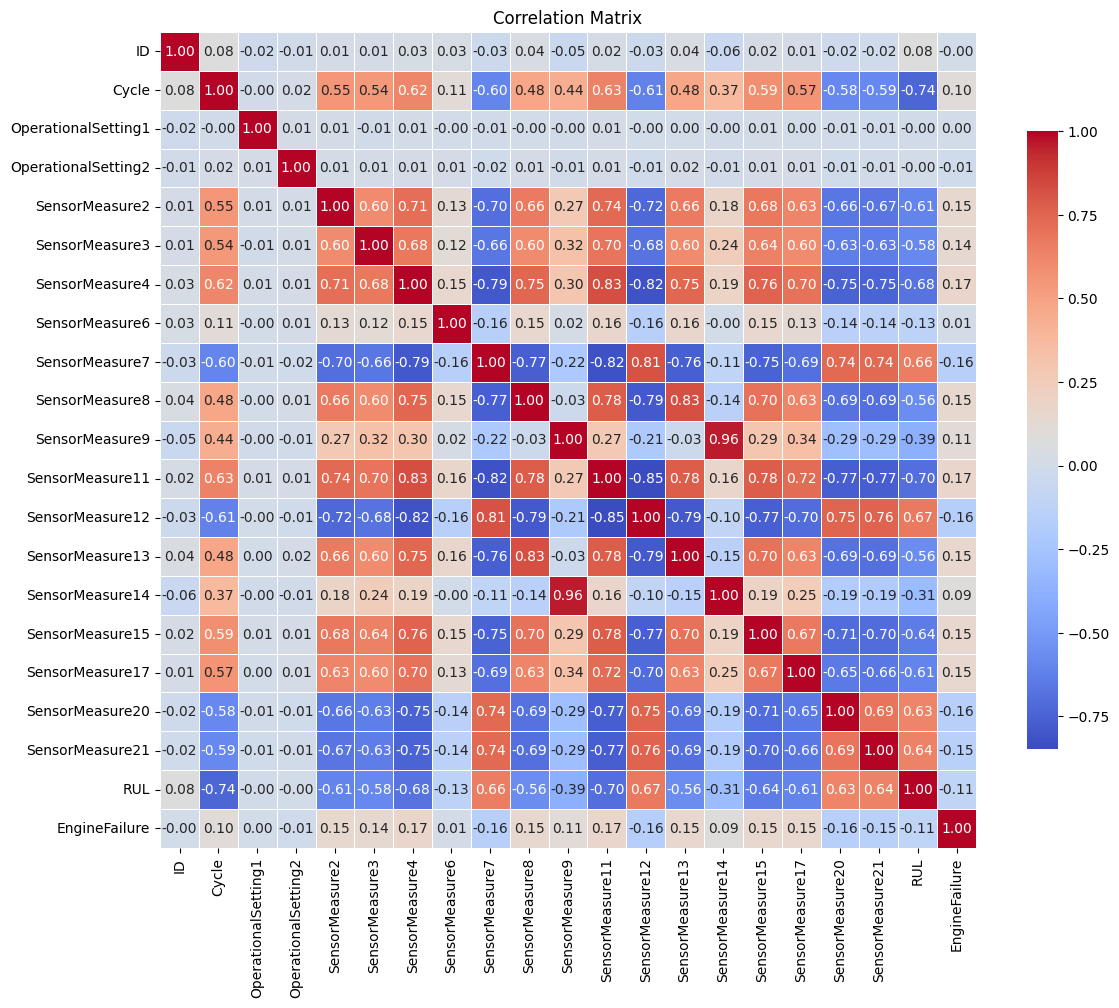

In [ ]:
# Drop highly correlated features and plot the correlation matrix again, note the reduction in sparcity
df.drop(columns=['OperationalSetting3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure10', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19'])
df_new = df.drop(columns=['OperationalSetting3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure10', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19'])
plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=.5,
            cbar_kws={"shrink": .75})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
useless_columns = ['Setting3', 'Sensor1', 'Sensor5', 'Sensor10', 'Sensor16', 'Sensor18', 'Sensor19', 'Sensor22', 'Sensor23']

# Load a given dataset and drop the useless columns
def get_dataset(path):
    df = pd.read_csv(path, sep=" ", header=None)
    misc_cols = ['ID', 'Cycle']
    settings = [f'Setting{i}' for i in range(1, 4)]
    sensors = [f'Sensor{i}' for i in range(1, 24)]
    columns = misc_cols + settings + sensors
    df.columns = columns
    df.drop(columns=useless_columns, axis=1, inplace=True)
    return df

# Add remaining useful life (RUL) column to all engines
def add_RUL_event_columns(df):
    max_cycle = df.groupby(by="ID")["Cycle"].max()
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='ID', right_index=True)
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Cycle"]
    result_frame["RUL"] = remaining_useful_life
    result_frame = result_frame.drop("max_cycle", axis=1)

    return result_frame

In [ ]:
# Load and process data
df1_train = get_dataset('CMAPSSData/train_FD001.txt')
# df2_train = get_dataset('CMAPSSDATA/train_FD002.txt')
# df3_train = get_dataset('CMAPSSDATA/train_FD003.txt')
# df4_train = get_dataset('CMAPSSDATA/train_FD004.txt')
# combined_train = pd.concat([df1_train, df2_train, df3_train, df4_train])

df1_test = get_dataset('CMAPSSData/test_FD001.txt')
# df2_test = get_dataset('CMAPSSDATA/test_FD002.txt')
# df3_test = get_dataset('CMAPSSDATA/test_FD003.txt')
# df4_test = get_dataset('CMAPSSDATA/test_FD004.txt')
# combined_test = pd.concat([df1_test, df2_test, df3_test, df4_test])

# Add RUL and EngineFailure columns
# combined_train = add_RUL_event_columns(combined_train)
# combined_test = add_RUL_event_columns(combined_test)
df1_train = add_RUL_event_columns(df1_train)
df1_test = add_RUL_event_columns(df1_test)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features and target label for the training set and test set
X_train = df1_train.drop(['ID', 'RUL'], axis=1)
Y_train = df1_train['RUL']

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Find the last cycle for each engine in the test set and compare to the actual RUL
last_cycles_index = df1_test.groupby('ID')['Cycle'].idxmax()
X_test = df1_test.loc[last_cycles_index].drop(['ID', 'RUL'], axis=1)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
Y_test = pd.read_csv('CMAPSSData/RUL_FD001.txt', header=None)

In [17]:
# Train the model for linear regression
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred = model.predict(X_test_scaled)
rmse_LR = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2_LR = r2_score(Y_test, Y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse_LR}")
print(f"R^2: {r2_LR}")

Root Mean Squared Error (RMSE): 31.250474117639964
R^2: 0.43447256667365886


In [18]:
# train several boosting algorithms and compare their performance
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import time

# Initialize models
xgb = XGBRegressor()
cat = CatBoostRegressor()
lgbm = LGBMRegressor(verbosity=-1)

# Fit models
start = time.time()
xgb.fit(X_train, Y_train, verbose=False)
xgb_time = time.time() - start

start = time.time()
cat.fit(X_train, Y_train, verbose=False)
cat_time = time.time() - start

start = time.time()
lgbm.fit(X_train, Y_train)
lgbm_time = time.time() - start

# Prediction and evaluation
Y_pred_xgb = xgb.predict(X_test)
Y_pred_cat = cat.predict(X_test)
Y_pred_lgbm = lgbm.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(Y_test, Y_pred_xgb))
rmse_cat = np.sqrt(mean_squared_error(Y_test, Y_pred_cat))
rmse_lgbm = np.sqrt(mean_squared_error(Y_test, Y_pred_lgbm))

r2_xgb = r2_score(Y_test, Y_pred_xgb)
r2_cat = r2_score(Y_test, Y_pred_cat)
r2_lgbm = r2_score(Y_test, Y_pred_lgbm)

print(f'XGBoost  - RMSE: {rmse_xgb:.2f}, R^2: {r2_xgb:.4f}, Runtime: {xgb_time:.4f}')
print(f'CatBoost - RMSE: {rmse_cat:.2f}, R^2: {r2_cat:.4f}, Runtime: {cat_time:.4f}')
print(f'LightGBM - RMSE: {rmse_lgbm:.2f}, R^2: {r2_lgbm:.4f}, Runtime: {lgbm_time:.4f}')

XGBoost  - RMSE: 30.42, R^2: 0.4643, Runtime: 0.0837
CatBoost - RMSE: 27.62, R^2: 0.5581, Runtime: 1.2426
LightGBM - RMSE: 26.70, R^2: 0.5873, Runtime: 0.0623


In [19]:
print(X_train.columns)

Index(['Cycle', 'Setting1', 'Setting2', 'Sensor2', 'Sensor3', 'Sensor4',
       'Sensor6', 'Sensor7', 'Sensor8', 'Sensor9', 'Sensor11', 'Sensor12',
       'Sensor13', 'Sensor14', 'Sensor15', 'Sensor17', 'Sensor20', 'Sensor21'],
      dtype='object')


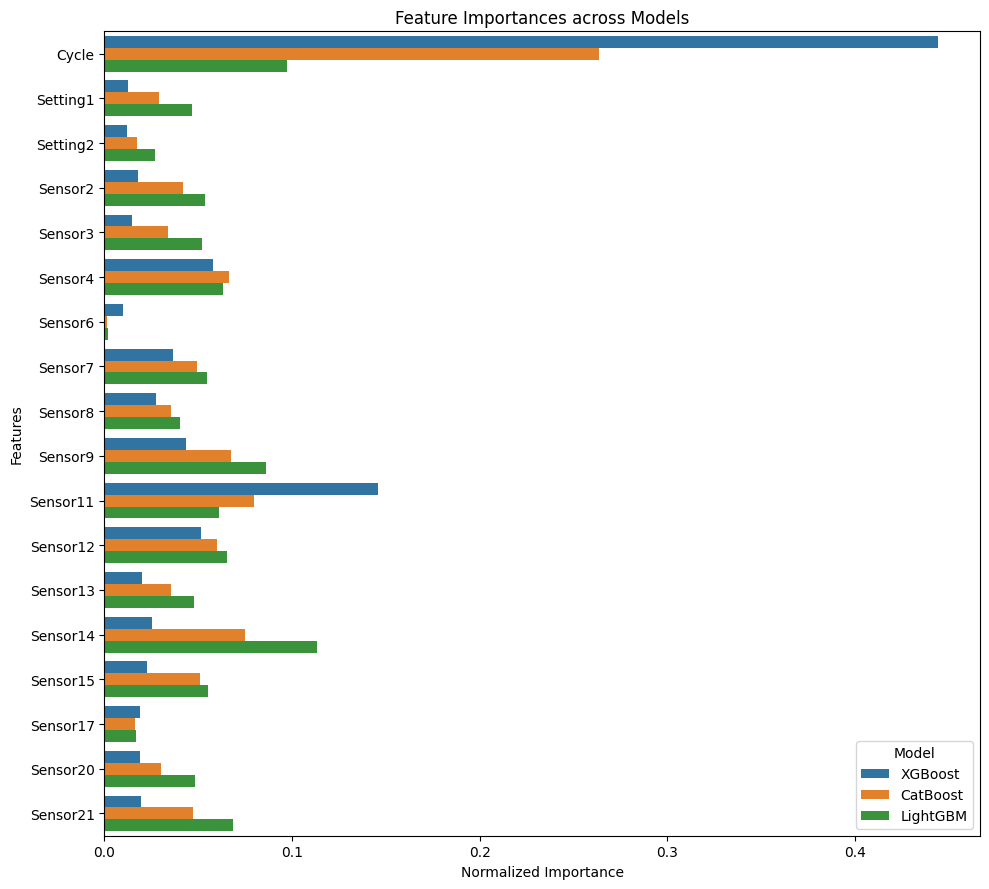

In [20]:
# Plot feature importances for each model
from xgboost import plot_importance as xgb_plot_importance
from lightgbm import plot_importance as lgb_plot_importance

feature_names = X_train.columns.tolist()

# Get feature importances
xgb_importances = xgb.feature_importances_
cat_importances = cat.get_feature_importance()
lgb_importances = lgbm.feature_importances_

# Normalize importances
xgb_importances = xgb_importances / np.sum(xgb_importances)
cat_importances = cat_importances / np.sum(cat_importances)
lgb_importances = lgb_importances / np.sum(lgb_importances)


df_importances = pd.DataFrame({
    'Features': feature_names,
    'XGBoost': xgb_importances,
    'CatBoost': cat_importances,
    'LightGBM': lgb_importances
}).melt(id_vars=['Features'], var_name='Model', value_name='Importance')

# Plotting
fig, ax = plt.subplots(figsize=(10, len(feature_names) / 2))
sns.barplot(x='Importance', y='Features', hue='Model', data=df_importances, ax=ax)
ax.set_title('Feature Importances across Models')
ax.set_xlabel('Normalized Importance')
ax.set_ylabel('Features')
plt.tight_layout()
plt.show()

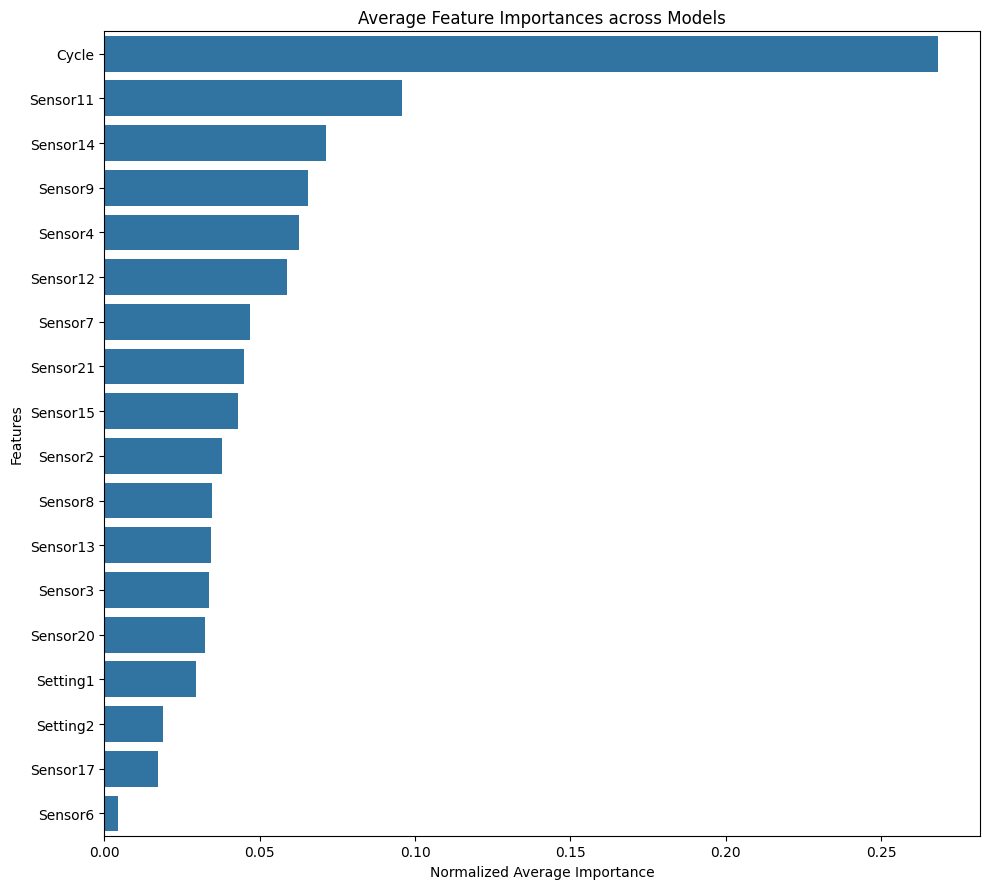

In [21]:
avg_importances = (xgb_importances + cat_importances + lgb_importances) / 3

df_avg_importances = pd.DataFrame({
    'Features': feature_names,
    'Average Importance': avg_importances
})

df_avg_importances = df_avg_importances.sort_values(by='Average Importance', ascending=False)

plt.figure(figsize=(10, len(feature_names) / 2))
sns.barplot(x='Average Importance', y='Features', data=df_avg_importances)
plt.title('Average Feature Importances across Models')
plt.xlabel('Normalized Average Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [22]:
# Drop the least important features to simplify CNN-LSTM model to prevent overfitting
drop_columns = ['Sensor6', 'Sensor17', 'Setting2']
df1_train = df1_train.drop(columns=drop_columns, axis=1)
df1_test = df1_test.drop(columns=drop_columns, axis=1)
X_train = df1_train.drop(['ID', 'RUL'], axis=1)
Y_train = df1_train['RUL']

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [72]:
# Run the open source transformer model
!python RUL_Transformer/train.py --dataset FD001

Epoch: 0, training loss: 5641.46985, testing rmse: 60.35160
Epoch: 1, training loss: 3513.54599, testing rmse: 46.94501
Epoch: 2, training loss: 1977.94012, testing rmse: 59.81451
Epoch: 3, training loss: 894.33758, testing rmse: 57.83207
Figure(1000x600)


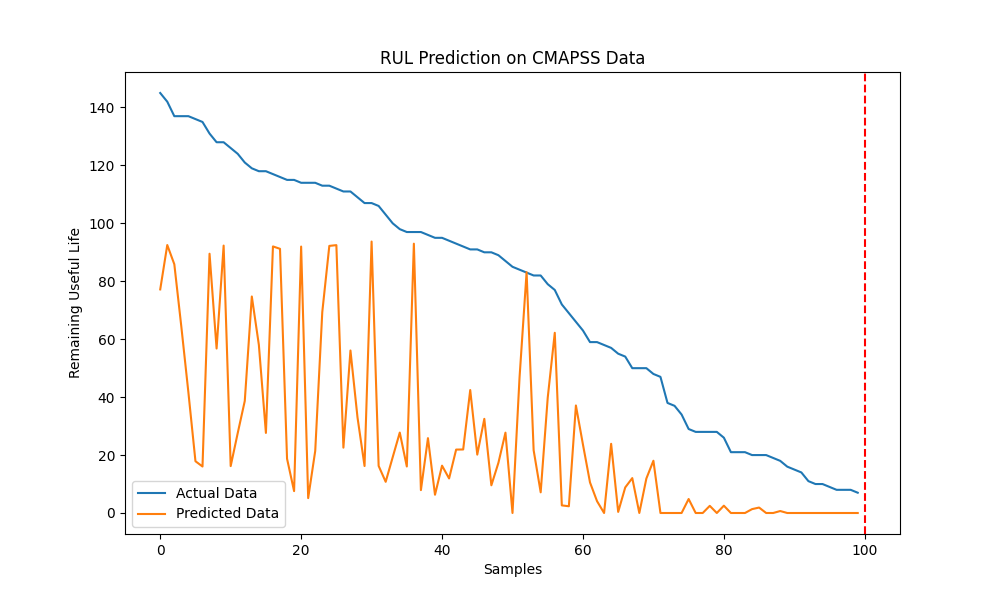

In [20]:
from IPython.display import Image

Image(filename='Transformer([58.63875768]).png')

In [27]:
# create sequences of length window size for the CNN-LSTM model
def create_sequences_np(X, y, window_size=30):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size + 1):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size-1])
    return np.array(X_seq), np.array(y_seq)


In [28]:
X_train_seq, Y_train_seq = create_sequences_np(X_train_scaled, Y_train)
print(f'X_train_seq.shape: {X_train_seq.shape}')
print(f'Y_train_seq.shape: {Y_train_seq.shape}')

X_train_seq.shape: (20602, 30, 15)
Y_train_seq.shape: (20602,)


In [29]:
df1_test.sort_values(by=['ID', 'Cycle'], inplace=True)
X_test_scaled = pd.DataFrame(scaler.transform(df1_test.drop(['ID', 'RUL'], axis=1)), columns=X_train_scaled.columns)

engine_cycles = {}

for id in df1_test['ID'].unique():
    engine_data = df1_test[df1_test['ID'] == id]
    min_cycle = engine_data['Cycle'].min()
    max_cycle = engine_data['Cycle'].max()
    engine_cycles[id] = (min_cycle, max_cycle)


In [30]:
# find the last sequence of length window_size to predict the final RUL and compare to actual RUL for testing
def create_test_sequences(X_test_scaled, engine_cycles, window_size=30):
    sequences = []
    for id, life_cycle in engine_cycles.items():
        start_idx, end_idx = life_cycle
        if (end_idx - start_idx + 1) >= window_size:
            seq = X_test_scaled[end_idx - window_size + 1:end_idx + 1]
            sequences.append(seq)
        else:
            print('reduce window size')
    return np.array(sequences)

X_test_seq = create_test_sequences(X_test_scaled, engine_cycles)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Flatten, TimeDistributed, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

# Define the CNN-LSTM model
num_features = 15
window_size = 30

model = Sequential()

# add CNN layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(window_size, num_features), padding='same', kernel_regularizer=l2(0.2)))
# high dropout rate to prevent overfitting
model.add(Dropout(0.5))
# add max pooling layer
model.add(MaxPooling1D(pool_size=2, padding='same'))
# add LSTM layer
model.add(LSTM(units = 50, return_sequences=False, kernel_regularizer=l2(0.2)))
# add dense layer
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.2)))
# high dropout rate to prevent overfitting
model.add(Dropout(0.5))
# add output layer (regression)
model.add(Dense(1, activation = 'linear'))
# compile the model with Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 30, 128)           5888      
                                                                 
 dropout_6 (Dropout)         (None, 30, 128)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 15, 128)          0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 50)                35800     
                                                                 
 dense_6 (Dense)             (None, 20)                1020      
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                      

In [42]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# callback functions to minimize overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001, verbose=1)

# Train the model
history = model.fit(X_train_seq, Y_train_seq, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping, reduce_lr])

Epoch 1/100


258/258 [==============================] - 4s 14ms/step - loss: 9615.3047 - mae: 77.0422 - val_loss: 7166.8296 - val_mae: 60.1317 - lr: 0.0010
Epoch 2/100
258/258 [==============================] - 2s 9ms/step - loss: 3364.3364 - mae: 40.4374 - val_loss: 3695.8201 - val_mae: 41.6583 - lr: 0.0010
Epoch 3/100
258/258 [==============================] - 2s 9ms/step - loss: 2597.7476 - mae: 35.1218 - val_loss: 3513.8054 - val_mae: 40.4616 - lr: 0.0010
Epoch 4/100
258/258 [==============================] - 4s 15ms/step - loss: 2475.9531 - mae: 34.5834 - val_loss: 3586.5161 - val_mae: 41.1280 - lr: 0.0010
Epoch 5/100
258/258 [==============================] - 7s 25ms/step - loss: 2446.2527 - mae: 34.3292 - val_loss: 3467.2971 - val_mae: 41.3304 - lr: 0.0010
Epoch 6/100
258/258 [==============================] - 4s 17ms/step - loss: 2432.2095 - mae: 34.0740 - val_loss: 3230.9509 - val_mae: 39.7122 - lr: 0.0010
Epoch 7/100
258/258 [==============================] - 5s 20ms/step - loss: 2438.271

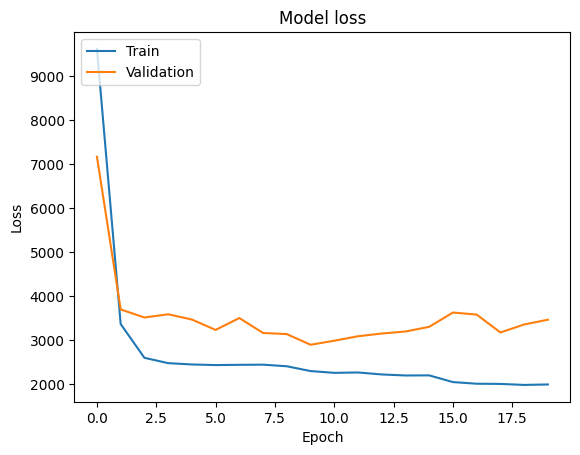

In [43]:
# plot the training and validation loss, note overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [44]:
# Predict the RUL for the test set
predicted_rul = model.predict(X_test_seq)

4/4 [==============================] - 0s 2ms/step


In [45]:
# Evaluate the model, note the high RMSE and low R^2 indicating poor performance
rmse = np.sqrt(mean_squared_error(Y_test, predicted_rul))
r2 = r2_score(Y_test, predicted_rul)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2: {r2}")

Root Mean Squared Error (RMSE): 60.645388014950825
R^2: -1.129786225598008
